In [73]:
import pandas as pd
import numpy as np
import json
import os
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = [10,6]

%matplotlib inline

# skip all warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

from datetime import datetime
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
# define the data source path
abs_dir = "/Users/etta/Desktop/youtube-new/"

# get the file names
lst = os.listdir(abs_dir)
dfs = pd.DataFrame()

for path in lst:
    if '.csv' in path:
        tmp = pd.read_csv(abs_dir + path, encoding = "latin1")
        # add country attribute
        tmp["country"] = path[:2]
        dfs = pd.concat([dfs,tmp])

dfs.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX


In [3]:
# fetch the categories
id_to_category = {}

with open("/Users/etta/Desktop/youtube-new/US_category_id.json", 'r') as f:
    data = json.load(f)
    for category in data["items"]:
        id_to_category[category["id"]] = category['snippet']['title']

In [4]:
# add category name into original dataset
dfs['category_id'] = dfs['category_id'].astype(str)
dfs['category'] = dfs['category_id'].map(id_to_category)
dfs.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX,Howto & Style


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 38915
Data columns (total 18 columns):
video_id                  375942 non-null object
trending_date             375942 non-null object
title                     375942 non-null object
channel_title             375942 non-null object
category_id               375942 non-null object
publish_time              375942 non-null object
tags                      375942 non-null object
views                     375942 non-null int64
likes                     375942 non-null int64
dislikes                  375942 non-null int64
comment_count             375942 non-null int64
thumbnail_link            375942 non-null object
comments_disabled         375942 non-null bool
ratings_disabled          375942 non-null bool
video_error_or_removed    375942 non-null bool
description               356464 non-null object
country                   375942 non-null object
category                  375942 non-null object
dtypes: bool(3), i

Only `description` has missing value, let's use tags to fill it.

In [6]:
dfs['description'] = dfs['description'].fillna(dfs['tags'])

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 38915
Data columns (total 18 columns):
video_id                  375942 non-null object
trending_date             375942 non-null object
title                     375942 non-null object
channel_title             375942 non-null object
category_id               375942 non-null object
publish_time              375942 non-null object
tags                      375942 non-null object
views                     375942 non-null int64
likes                     375942 non-null int64
dislikes                  375942 non-null int64
comment_count             375942 non-null int64
thumbnail_link            375942 non-null object
comments_disabled         375942 non-null bool
ratings_disabled          375942 non-null bool
video_error_or_removed    375942 non-null bool
description               375942 non-null object
country                   375942 non-null object
category                  375942 non-null object
dtypes: bool(3), i

In [38]:
dfs.shape

(375942, 19)

## Numerical Columns

In [24]:
dfs['popularity'] = (dfs['likes'] + dfs['dislikes'] + dfs['comment_count']) / dfs['views']

In [25]:
dfs.describe()

,views,likes,dislikes,comment_count,popularity
count,3.759420e+05,3.759420e+05,3.759420e+05,3.759420e+05,375942.000000
mean,1.326568e+06,3.788431e+04,2.126107e+03,4.253775e+03,0.043249
std,7.098568e+06,1.654131e+05,2.248437e+04,2.545876e+04,0.045295
min,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.697800e+04,6.690000e+02,4.100000e+01,1.090000e+02,0.011376
50%,1.773705e+05,3.446000e+03,1.790000e+02,5.110000e+02,0.028327
75%,6.476792e+05,1.747650e+04,7.490000e+02,2.011000e+03,0.061006
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,0.996741


### Histograms

**Views**

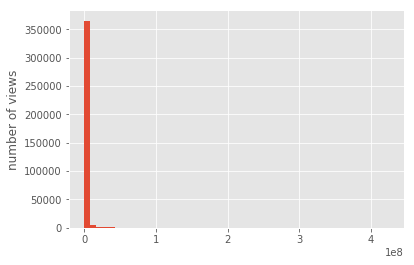

In [36]:
dfs['views'].hist(bins = 50)
plt.xlabel("number of views")
plt.ylabel('number of videos')
plt.title('Histogram of total views')
plt.show()

**Likes**

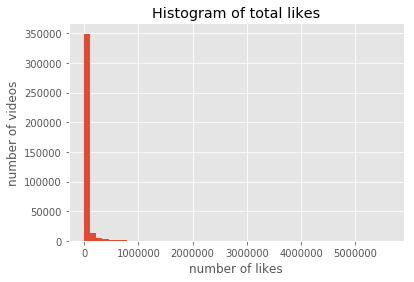

In [39]:
dfs['likes'].hist(bins = 50)
plt.xlabel("number of likes")
plt.ylabel('number of videos')
plt.title('Histogram of total likes')
plt.show()

**Dislikes**

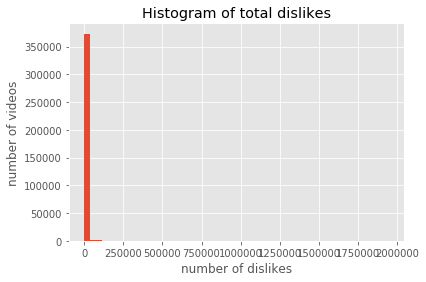

In [43]:
dfs['dislikes'].hist(bins = 50)
plt.xlabel("number of dislikes")
plt.ylabel('number of videos')
plt.title('Histogram of total dislikes')
plt.show()

**Comment Counts**

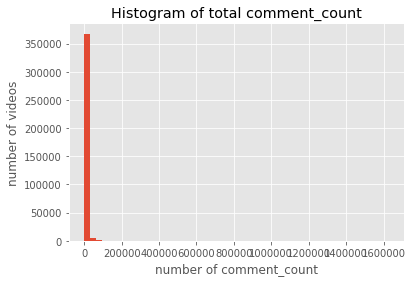

In [41]:
dfs['comment_count'].hist(bins = 50)
plt.xlabel("number of comment_count")
plt.ylabel('number of videos')
plt.title('Histogram of total comment_count')
plt.show()

**Popularity**

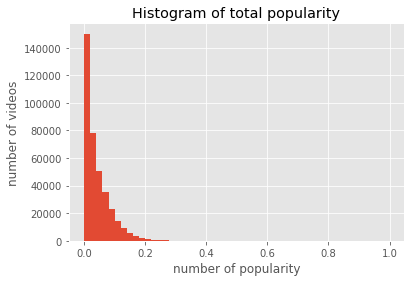

In [44]:
dfs['popularity'].hist(bins = 50)
plt.xlabel("number of popularity")
plt.ylabel('number of videos')
plt.title('Histogram of total popularity')
plt.show()

### Categorical variables

In [57]:
dfs.describe(exclude=[np.number])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
count,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942,375942
unique,184287,205,186272,37824,18,169286,142211,185690,2,2,2,160540,10,18
top,#NAME?,18.08.02,Mission: Impossible - Fallout (2018) - Officia...,The Late Show with Stephen Colbert,24,2018-05-06T04:00:07.000Z,[none],https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,[none],US,Entertainment
freq,2312,1965,100,984,109006,92,37698,92,367479,368634,375689,11509,40949,109006


### Channel

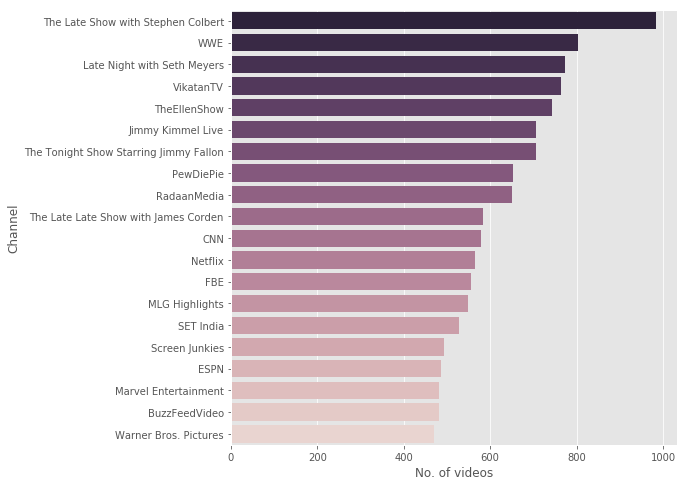

In [67]:
cdf = dfs.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

### Country

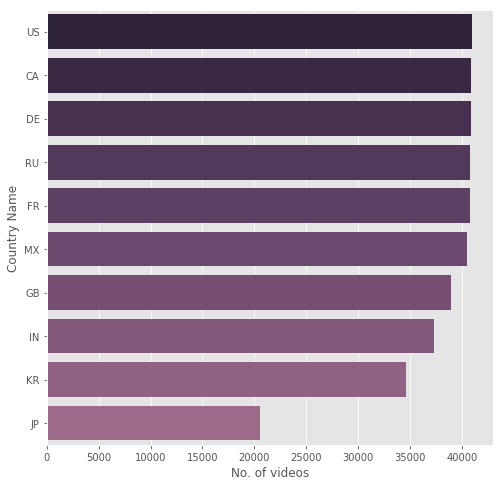

In [64]:
cdf = dfs.groupby("country").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="country", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Country Name")

### Topics

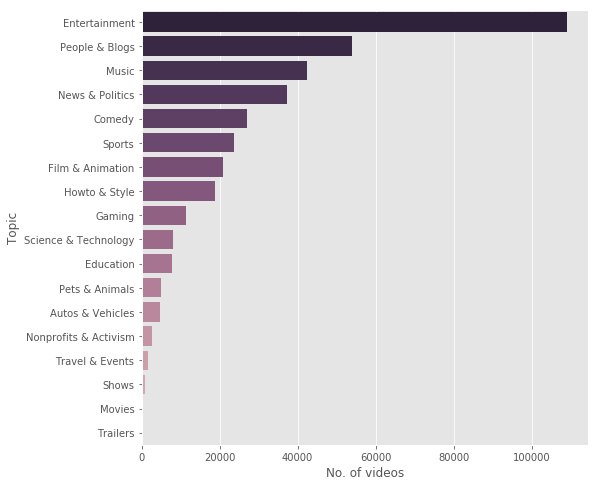

In [65]:
cdf = dfs.groupby("category").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="category", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Topic")

### Target varibale -- popularity

In [68]:
dfs['popularity'].describe()

count    375942.000000
mean          0.043249
std           0.045295
min           0.000000
25%           0.011376
50%           0.028327
75%           0.061006
max           0.996741
Name: popularity, dtype: float64

In [69]:
dfs['is_popular'] = dfs['popularity'].apply(lambda x: 0 if x <= 0.028 else 1)

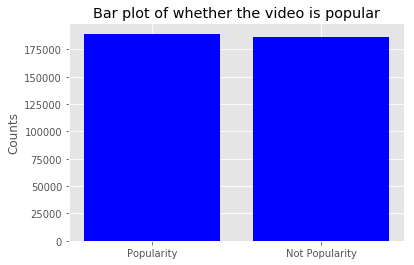

In [72]:
# Bar plot
x_pos = ['Popularity', 'Not Popularity']
x = dfs['is_popular'].value_counts()

plt.bar(x_pos, x, color='blue')
plt.ylabel('Counts')
plt.title("Bar plot of whether the video is popular")
plt.show()

## Prdictive Modeling

#### Train Test Split

In [74]:
# get X and y

y = dfs['is_popular'].values
X = dfs.drop(['is_popular'], axis=1).values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.shape

(300753, 20)